In [30]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_boston

In [6]:
#reading the data
def read_data():
    boston = load_boston()
    features = np.array(boston.data)
    labels = np.array(boston.target)
    return features,labels

In [7]:
#normalization the data
def normalise_feature(dataset):
    mu = np.mean(dataset , axis =0 , dtype=np.float32 )
    sigma = np.std(dataset , axis = 0, dtype=np.float32)
    scalar_dataset = (dataset-mu)/sigma
    return scalar_dataset    

In [8]:
#appending bias
def append_bias_reshape(features,labels):
    n_training_samples = features.shape[0]
    n_dim = features.shape[1]
    f = np.c_[np.ones(n_training_samples) , features]
    l = np.reshape(labels,(n_training_samples , 1))
    return f,l

In [11]:
#train test split
def train_test_split(f , l):
    np.random.seed(42)
    rnd_indices = np.random.rand(len(f))<0.80
    
    X_train = f[rnd_indices]
    y_train = l[rnd_indices]
    X_test = f[~rnd_indices]
    y_test = l[~rnd_indices]
    
    return X_train,X_test,y_train,y_test
    
    

In [12]:
features,labels = read_data()
# print(features,labels)
normalised_feature = normalise_feature(features)
# print(normalised_feature)
f , l = append_bias_reshape(normalised_feature ,labels )
X_train,X_test,y_train,y_test =train_test_split(f,l)  

In [22]:
#model training
lr = 0.005
training_epochs = 1000
n_dim = f.shape[1]
sess = tf.Session()
cost_history = np.empty(shape=[1] , dtype= float)

X = tf.placeholder(tf.float32 , [None , n_dim], name ="X")
Y = tf.placeholder(tf.float32 , [None , 1], name ="y")
W = tf.Variable(tf.ones([n_dim,1]) , name = 'weights')

init = tf.global_variables_initializer()
sess.run(init)

In [27]:
#hypothesis
y_pred = tf.matmul(X,W)
cost = tf.reduce_mean(tf.square(Y - y_pred))
training_step = tf.train.GradientDescentOptimizer(lr).minimize(cost)

for _ in range(training_epochs):
    sess.run(training_step , feed_dict={X:X_train , Y:y_train})
    cost_history = np.append(cost_history,sess.run(cost, feed_dict={X:X_train , Y:y_train}))
    

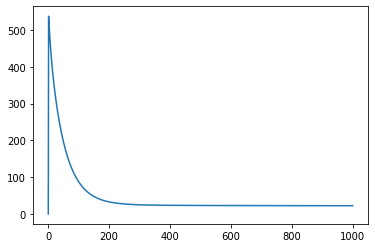

In [31]:
plt.plot(range(len(cost_history)),cost_history)
plt.show()

In [32]:
y_pred = sess.run(y_pred , feed_dict={X : X_test})

In [37]:
rmse = tf.reduce_mean(tf.square(y_test - y_pred))

In [39]:
# metrics 
sess.run(rmse)

24.561947512116294